In [1]:
# 와인의 종류 예측하기
import pandas as pd

df = pd.read_csv('./data/data/wine.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
X= df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [3]:
# 데이터를 학습용과 테스트용으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [4]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25)

Epoch 1/100
8/8 [==============================] - 1s 37ms/step - loss: 0.8110 - accuracy: 0.7524 - val_loss: 0.6552 - val_accuracy: 0.7338
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5978 - accuracy: 0.7331 - val_loss: 0.4998 - val_accuracy: 0.7562
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.4607 - accuracy: 0.7549 - val_loss: 0.3905 - val_accuracy: 0.7762
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3763 - accuracy: 0.8099 - val_loss: 0.3371 - val_accuracy: 0.8577
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.3272 - accuracy: 0.8619 - val_loss: 0.2868 - val_accuracy: 0.8823
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2876 - accuracy: 0.8820 - val_loss: 0.2509 - val_accuracy: 0.9085
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2572 - accuracy: 0.9066 - val_loss: 0.2229 - val_accuracy: 0.9254
Epoch 8/100
8/8 [=========

8/8 [==============================] - 0s 7ms/step - loss: 0.1293 - accuracy: 0.9515 - val_loss: 0.1104 - val_accuracy: 0.9623
Epoch 60/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1280 - accuracy: 0.9518 - val_loss: 0.1103 - val_accuracy: 0.9623
Epoch 61/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1277 - accuracy: 0.9525 - val_loss: 0.1084 - val_accuracy: 0.9631
Epoch 62/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1260 - accuracy: 0.9523 - val_loss: 0.1119 - val_accuracy: 0.9615
Epoch 63/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1263 - accuracy: 0.9533 - val_loss: 0.1061 - val_accuracy: 0.9623
Epoch 64/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1234 - accuracy: 0.9525 - val_loss: 0.1044 - val_accuracy: 0.9638
Epoch 65/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1222 - accuracy: 0.9536 - val_loss: 0.1103 - val_accuracy: 0.9638
Epoch 66/100
8/8 [===============

In [5]:
# 모델 결과 출력
score = model.evaluate(X_test, y_test)
# print("Test loss :", score[0], "Test accuracy : ", score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9723


In [6]:
# check point를 통해 모델 업데이트
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
model_path = "./data/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=model_path, verbose=True)

In [8]:
# import os
# os.getcwd()

In [9]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model_path = './data/data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'
# epoch 실행시 마다 모델을 파일로 저장
checkpointer = ModelCheckpoint(filepath=model_path, verbose=True)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 : callbacks를 설정
model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25, verbose=0,
         callbacks=[checkpointer])


Epoch 1: saving model to ./data/data/model/all\01-0.2438.hdf5

Epoch 2: saving model to ./data/data/model/all\02-0.2438.hdf5

Epoch 3: saving model to ./data/data/model/all\03-0.2354.hdf5

Epoch 4: saving model to ./data/data/model/all\04-0.2400.hdf5

Epoch 5: saving model to ./data/data/model/all\05-0.2308.hdf5

Epoch 6: saving model to ./data/data/model/all\06-0.4762.hdf5

Epoch 7: saving model to ./data/data/model/all\07-0.8562.hdf5

Epoch 8: saving model to ./data/data/model/all\08-0.8985.hdf5

Epoch 9: saving model to ./data/data/model/all\09-0.9100.hdf5

Epoch 10: saving model to ./data/data/model/all\10-0.9169.hdf5

Epoch 11: saving model to ./data/data/model/all\11-0.9215.hdf5

Epoch 12: saving model to ./data/data/model/all\12-0.9254.hdf5

Epoch 13: saving model to ./data/data/model/all\13-0.9285.hdf5

Epoch 14: saving model to ./data/data/model/all\14-0.9315.hdf5

Epoch 15: saving model to ./data/data/model/all\15-0.9323.hdf5

Epoch 16: saving model to ./data/data/model/all\

In [10]:
model.history.history['accuracy'].index(max(model.history.history['accuracy']))

99

In [11]:
# 모델 생성
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 : callbacks를 설정
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0,
         )

In [12]:
import pandas as pd

hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.062552,0.218373,0.808053,0.214615
1,0.719673,0.549654,0.685574,0.862308
2,0.685375,0.849115,0.682076,0.846923
3,0.671283,0.842956,0.617181,0.852308
4,0.456898,0.831665,0.373980,0.829231


In [13]:
# 그래프로 확인 ( 에러 -> 손실함수의 결과)
import matplotlib.pyplot as plt
import numpy as np

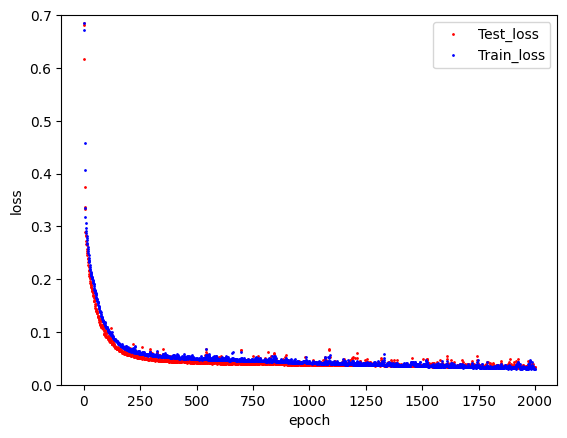

In [14]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, 'o',markersize=1, c='red', label='Test_loss')
plt.plot(x_len, y_loss, 'o',markersize=1, c='blue', label='Train_loss')
plt.legend()
plt.ylim(0,0.7)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
# 종단점 설정
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
early_stopping_callback = EarlyStopping(patience=20)
checkpointer = ModelCheckpoint(filepath=model_path, verbose=0, save_best_only=True)

model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0309 - accuracy: 0.9910 - val_loss: 0.0342 - val_accuracy: 0.9908
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0320 - accuracy: 0.9905 - val_loss: 0.0346 - val_accuracy: 0.9908
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0336 - val_accuracy: 0.9900
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0312 - accuracy: 0.9887 - val_loss: 0.0358 - val_accuracy: 0.9908
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0355 - val_accuracy: 0.9908
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.0326 - val_accuracy: 0.9900
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0308 - accuracy: 0.9908 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 8/100
8/8 [=======